In [ ]:
from networkx.generators.random_graphs import erdos_renyi_graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from random import sample
import copy

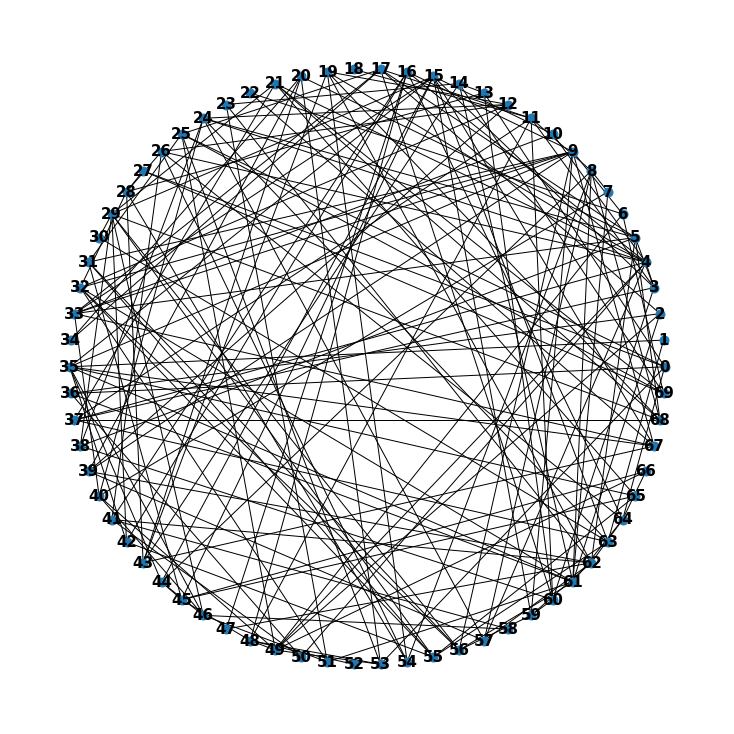

In [ ]:
#задаем рандомный граф с 100 вершинами 
n = 70
p = 0.08 # can change to 0.08
G = erdos_renyi_graph(n, p) 
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 10))
nx.draw(G,pos,node_size=80,labels=dict(zip(list(G.nodes()), list(G.nodes()))), with_labels=True,font_size=15,font_weight='bold') 
plt.show()

In [ ]:
def random_choose_node(nodes, amount,color):
  new_list = sample(nodes,amount)
  leftover = list(set(nodes)-set(new_list))
  dict_colors = dict(zip(new_list,[color]*len(new_list))) 
  return new_list,leftover,dict_colors
for i in G.nodes():
  G.nodes[i]['color'] = 'white'
G.nodes.data()
green,left,green_dict = random_choose_node(list(G.nodes()), 20, 'blue')
red,left,red_dict =random_choose_node(left, 20,'red')
np.sort(np.array(red))
np.sort(np.array(green))
np.array(left)

array([ 1,  5,  6, 10, 13, 14, 15, 16, 18, 23, 24, 26, 30, 31, 33, 34, 37,
       41, 42, 43, 50, 52, 53, 54, 58, 60, 61, 65, 67, 68])

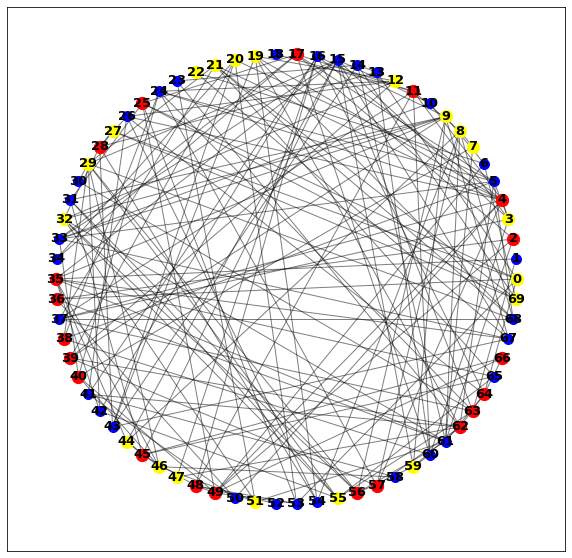

In [ ]:
nx.set_node_attributes(G, red_dict, 'color')
nx.set_node_attributes(G, green_dict, 'color')
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G,pos, node_size=100, nodelist=set(G.nodes) - set(green)-set(red), node_color="blue")
nx.draw_networkx_nodes(G,pos,node_size=150, nodelist=red, node_color="red")
nx.draw_networkx_nodes(G, pos, node_size=150, nodelist=green, node_color="yellow")
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
nx.draw_networkx_labels(G,pos, labels=dict(zip(list(G.nodes()), list(G.nodes))), font_size=13,font_weight='bold')
plt.show()

In [ ]:
neutral = copy.deepcopy(left)
red1 = copy.deepcopy(red)
green1= copy.deepcopy(green)
red_amount = [len(red1)]
green_amount = [len(green1)]

In [ ]:
def change_neutral_color(node, G, left, green, red):
  to_nodes = set(list(zip(*list(G.edges(node))))[1])
  print(f'nodes {to_nodes}') 
  red_nodes = to_nodes & set(red) 
  green_nodes = to_nodes & set(green)
  if (len(red_nodes) + len(green_nodes) == 0):
    state = random.randint(1, 2) 
    print('random:', state, '', node) 
    return state
  if (len(red_nodes) > len(green_nodes)):
    print(node, ' ', 1)
    return 1
  if (len(red_nodes) <= len(green_nodes)): 
    print(node, ' ', 2)
    return 2


new_red =[]
new_green=[]
for i in range(len(neutral)):
  state = change_neutral_color(neutral[i], G, left, green, red) 
  if state == 1:
    print(G.nodes[i]['color'])
    print('red')
    red1.append(neutral[i])
    new_red.append(neutral[i])
  if state == 2:
    print(G.nodes[i]['color']) 
    print('green') 
    green1.append(neutral[i]) 
    new_green.append(neutral[i])
  if i == 15 or i==30 or i==45: 
    red_amount.append(len(red1)) 
    green_amount.append(len(green1))

red_amount.append(len(red1))
green_amount.append(len(green1))
np.array(new_red)
np.array(new_green)
new_red = dict(zip(new_red,["red"]*len(new_red))) 
new_green = dict(zip(new_green,["green"]*len(new_green)))
np.sort(np.array(red1))
np.sort(np.array(green1))
set(neutral)-set(red1)-set(green1)

nodes {35, 63}
1   1
blue
red
nodes {33, 3, 68, 38, 17, 20, 24, 62}
5   1
white
red
nodes {9, 69, 22, 49}
6   2
red
green
nodes {33, 4, 15}
10   1
blue
red
nodes {0, 28, 14, 60}
13   2
red
green
nodes {69, 43, 13, 23, 61}
14   2
white
green
nodes {33, 3, 35, 67, 10, 44, 45, 59, 29, 63}
15   2
white
green
nodes {64, 4, 9, 42, 41, 47, 48}
16   1
blue
red
nodes {11}
18   1
blue
red
nodes {62, 51, 14}
23   2
blue
green
nodes {4, 5, 38, 40, 12, 57, 63}
24   1
white
red
nodes {64, 4, 41, 12, 54, 28}
26   1
red
red
nodes {29, 63}
30   2
blue
green
nodes {9, 45, 55, 56, 25}
31   1
white
red
nodes {67, 5, 40, 9, 10, 15, 17}
33   1
white
red
nodes {17, 20}
34   2
white
green
nodes {3, 4, 68, 11, 21, 63}
37   1
white
red
nodes {58, 16, 50, 26, 62}
41   1
red
red
nodes {16, 35, 29, 55}
42   2
white
green
nodes {67, 14, 19, 20, 28}
43   2
blue
green
nodes {41, 4, 36}
50   1
blue
red
nodes {48}
52   1
blue
red
nodes {0, 48, 49, 20, 25}
53   1
blue
red
nodes {8, 26, 19, 28}
54   2
white
green
nodes {

set()

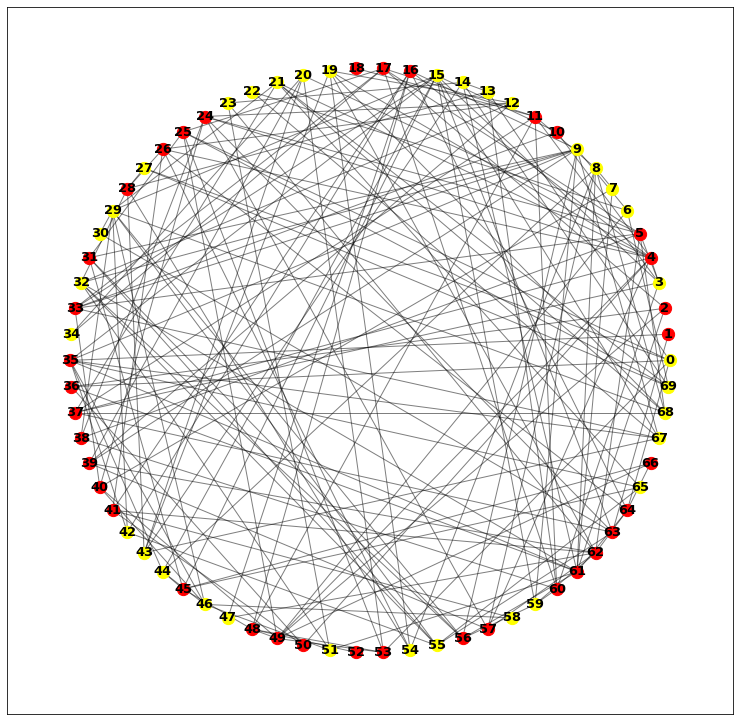

In [ ]:
nx.set_node_attributes(G, new_red, 'color')
nx.set_node_attributes(G, new_green, 'color')
x = [0,1,2,3,4]
pos = nx.circular_layout(G)
plt.figure(figsize=(13, 13))
nx.draw_networkx_nodes(G,pos,node_size=150, nodelist=red1, node_color="red")
nx.draw_networkx_nodes(G,pos,node_size=150, nodelist=green1, node_color="yellow")
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1) 
nx.draw_networkx_labels(G,pos, labels=dict(zip(list(G.nodes()), list(G.nodes))), font_size=13,font_weight='bold')
plt.show()


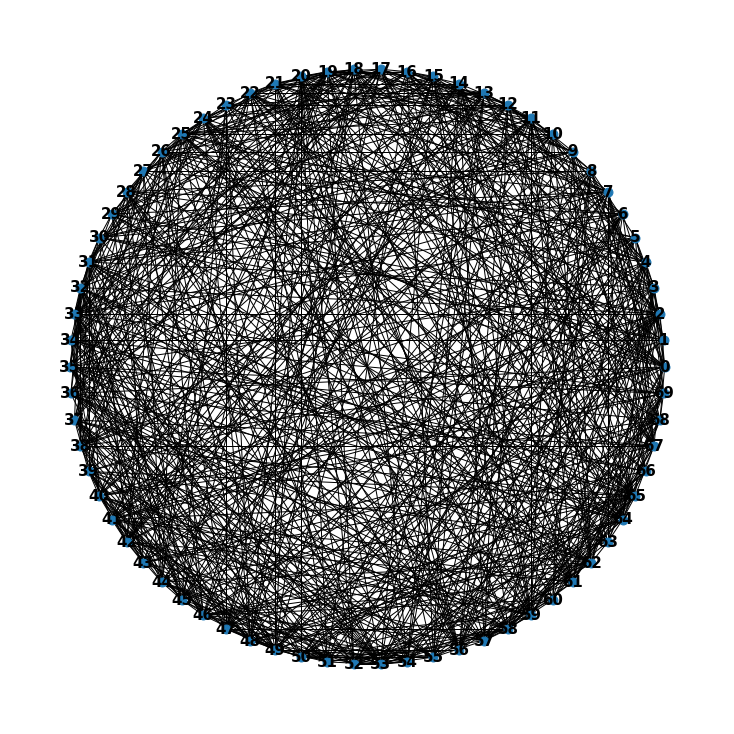

In [ ]:
n = 70
p = 0.3
G = erdos_renyi_graph(n, p) 
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 10)) 
nx.draw(G,pos,node_size=80,labels=dict(zip(list(G.nodes()), list(G.nodes()))), with_labels=True,font_size=15,font_weight='bold') 
plt.show()

In [ ]:
for i in G.nodes(): 
  G.nodes[i]['color'] = 'white'

np.sort(np.array(red))
np.sort(np.array(green))
np.array(left)

array([ 1,  5,  6, 10, 13, 14, 15, 16, 18, 23, 24, 26, 30, 31, 33, 34, 37,
       41, 42, 43, 50, 52, 53, 54, 58, 60, 61, 65, 67, 68])

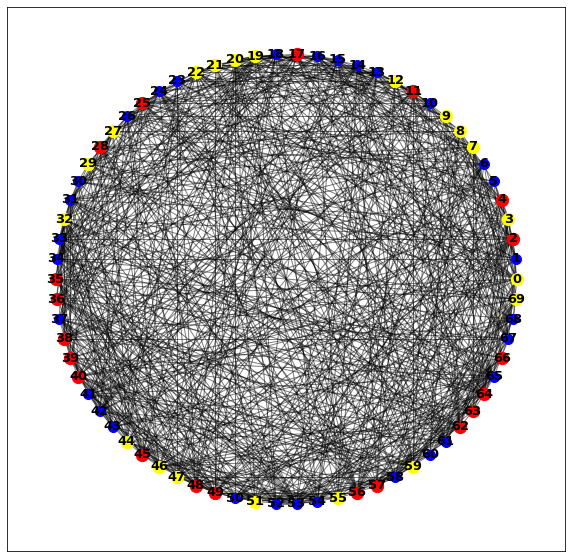

In [ ]:
nx.set_node_attributes(G, red_dict, 'color')
nx.set_node_attributes(G, green_dict, 'color')
pos = nx.circular_layout(G) 
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G,pos,node_size=100,nodelist=set(G.nodes) - set(green)-set(red), node_color="blue")
nx.draw_networkx_nodes(G,pos,node_size=150, nodelist=red,node_color="red")
nx.draw_networkx_nodes(G, pos,node_size=150, nodelist=green, node_color="yellow")
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1) 
nx.draw_networkx_labels(G,pos,labels=dict(zip(list(G.nodes()), list(G.nodes))), font_size=13,font_weight='bold')
plt.show()

In [ ]:
neutral = copy.deepcopy(left)
red1 = copy.deepcopy(red) 
green1= copy.deepcopy(green)
red_amount = [len(red1)] 
green_amount = [len(green1)]

In [ ]:
new_red =[]
new_green=[]
for i in range(len(neutral)):
  state = change_neutral_color(neutral[i], G, left, green, red) 
  if state == 1:
    red1.append(neutral[i])
    new_red.append(neutral[i]) 
  if state == 2:
    green1.append(neutral[i])
    new_green.append(neutral[i]) 
  if i == 15 or i==30 or i==45:
    red_amount.append(len(red1))
    green_amount.append(len(green1))


red_amount.append(len(red1))
green_amount.append(len(green1))
np.array(new_red)
np.array(new_green)
new_red = dict(zip(new_red,["red"]*len(new_red)))
new_green = dict(zip(new_green,["green"]*len(new_green)))

nodes {34, 3, 67, 5, 6, 8, 41, 48, 50, 22, 23, 29, 30}
1   2
nodes {1, 2, 3, 33, 36, 38, 67, 8, 41, 43, 49, 52, 53, 56, 25, 26, 59}
5   1
nodes {1, 14, 17, 21, 27, 28, 31, 33, 35, 43, 47, 49, 50, 51, 52, 53, 56, 61, 67}
6   1
nodes {0, 3, 35, 67, 38, 43, 13, 45, 16, 18, 20, 52, 55, 62, 25, 59, 30}
10   2
nodes {4, 10, 11, 19, 21, 22, 23, 24, 25, 30, 33, 38, 41, 42, 44, 45, 53, 54, 55, 67, 69}
13   2
nodes {6, 12, 16, 21, 24, 27, 36, 40, 42, 43, 46, 54, 55, 57, 59, 61, 62, 63, 65, 67, 68}
14   2
nodes {2, 7, 11, 16, 19, 25, 29, 34, 35, 42, 47, 48, 49, 53, 58, 59, 61, 64, 66}
15   1
nodes {2, 3, 4, 10, 11, 12, 14, 15, 17, 19, 20, 22, 29, 32, 33, 35, 46, 51, 55, 59, 65, 67, 68}
16   2
nodes {2, 8, 9, 10, 11, 20, 21, 22, 26, 27, 30, 32, 34, 40, 41, 46, 47, 48, 49, 54, 59, 61, 64, 67, 69}
18   2
nodes {0, 1, 12, 13, 44, 45, 47, 48, 21, 56, 25, 63}
23   2
nodes {4, 13, 14, 19, 20, 28, 31, 34, 36, 37, 48, 54, 56, 57, 58, 59, 61, 64, 65, 66, 68}
24   1
nodes {0, 3, 5, 7, 9, 12, 17, 18, 21, 25,

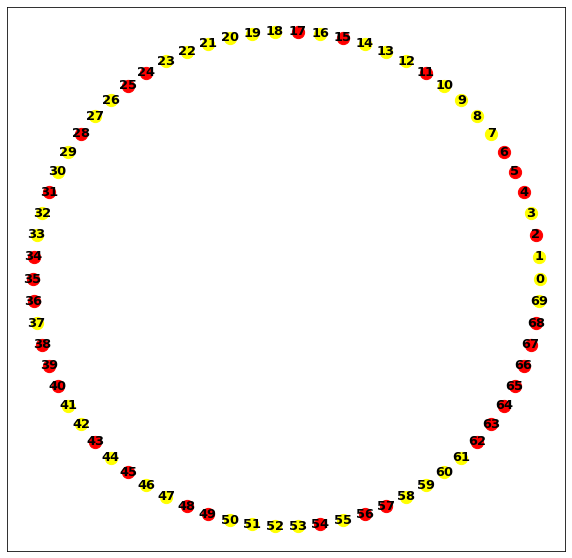

In [ ]:
nx.set_node_attributes(G, new_red, 'color')
nx.set_node_attributes(G, new_green, 'color')
set(neutral)-set(red1)-set(green1)
x = [0,1,2,3,4]
pos = nx.circular_layout(G)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G,pos,node_size=150, nodelist=red1, node_color="red")
nx.draw_networkx_nodes(G,pos,node_size=150, nodelist=green1, node_color="yellow")
nx.draw_networkx_labels(G,pos, labels=dict(zip(list(G.nodes()), list(G.nodes))), font_size=13,font_weight='bold')
plt.show()